In [114]:
from qutip import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [118]:
"""PARAMETERS"""

# h_bar = 1.0

# frequencies
wc = 5.0622 * 2 * pi  # already in GHz
wa = 4.7206 * 2 * pi
chi = 0.0052 * 2 * pi

# coupling
delta = abs(wc - wa)      # detuning
g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

kappa = 0.0  # cavity dissipation rate
t1 = 800           # qubit relaxation rate
t2 = 80            # qubit dephasing rate

N = 2.0            # number of cavity fock states
n_th_a = 0.063     # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,101)  # 101 numbers, evenly spaced from 0 to 25

In [119]:
# initial state
psi0 = tensor(basis(N,0), basis(2,1))  # start with an excited atom
# fock state ket vector: basis(N,#m), #m = level containing excitation
# tensor product: tensor()

# cavity destruction operator
a = tensor(destroy(N), qeye(2))
# lowering (destruction) operator: destroy(N)
# identity: qeye(N)

# operator for qubit
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + ga * (a.dag() + a) * (sm + sm.dag())

ValueError: All dimensions must be >= 0.

In [100]:
# collapse operators that describe dissipation

c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)
    
# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())
    
# qubit relaxation
rate = 1/t1
# c_ops.append(np.sqrt(rate) * sm)
c_ops.append(np.sqrt(rate * (1+n_th_a)) * sm)
c_ops.append(np.sqrt(rate * n_th_a) * sm.dag())
# c_ops.append(np.sqrt(t2) * sz)

In [101]:
# evolve system, request that the expectation values of a.dag()*a and sm*sm.dag() are returned by the solver 
# passing the list [a.dag()*a, sm.dag()*sm] as the fifth argument to the solver

output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi Oscillations')

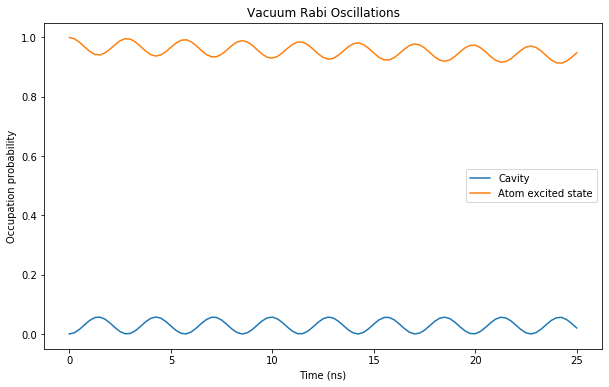

In [102]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(tlist,n_c,label="Cavity")
axes.plot(tlist,n_a,label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time (ns)")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi Oscillations")

In [72]:
"""n_c = output.expect[0]
n_a = output.expect[1]

# calculation of power spectrum
wlist = np.linspace(0.25, 1.75, 200) * 2 * np.pi
spec = spectrum(H, wlist2, c_ops, a.dag(), a)

fig, axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(wlist/(2*pi),spec,label="Cavity")
# axes.plot(wlist,spec,label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Frequency")
axes.set_ylabel("Power spectrum")
axes.set_title("Vacuum Rabi Oscillations")
axes.set_xlim(wlist[0]/(2*pi), wlist[-1]/(2*pi))"""

'n_c = output.expect[0]\nn_a = output.expect[1]\n\n# calculation of power spectrum\nwlist = np.linspace(0.25, 1.75, 200) * 2 * np.pi\nspec = spectrum(H, wlist2, c_ops, a.dag(), a)\n\nfig, axes = plt.subplots(1,1,figsize=(10,6))\n\naxes.plot(wlist/(2*pi),spec,label="Cavity")\n# axes.plot(wlist,spec,label="Atom excited state")\naxes.legend(loc=0)\naxes.set_xlabel("Frequency")\naxes.set_ylabel("Power spectrum")\naxes.set_title("Vacuum Rabi Oscillations")\naxes.set_xlim(wlist[0]/(2*pi), wlist[-1]/(2*pi))'